<a href="https://colab.research.google.com/github/srivatsalnarayan/car_vs_bike/blob/main/using_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Data

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_gen = ImageDataGenerator(rescale=1/255., validation_split= 0.10)
training_data = train_gen.flow_from_directory(root_path, class_mode= 'binary', 
                                              target_size= (256, 256), shuffle = True, 
                                              subset = 'training', batch_size= 3600)
validation_data = train_gen.flow_from_directory(root_path, class_mode= 'binary', 
                                                target_size= (256, 256), shuffle = True, 
                                                subset = 'validation', batch_size= 400)

Found 3600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
train_images_orig, train_labels_orig = training_data.next()
test_images_orig, test_labels_orig = validation_data.next()

In [ ]:
train_images = train_images_orig.reshape(train_images_orig.shape[1]*train_images_orig.shape[2]*
                                         train_images_orig.shape[3], train_images_orig.shape[0])
train_labels = train_labels_orig.reshape(1, len(train_labels_orig))

test_images = test_images_orig.reshape(test_images_orig.shape[1]*test_images_orig.shape[2]*
                                       test_images_orig.shape[3], test_images_orig.shape[0])
test_labels = test_labels_orig.reshape(1, len(test_labels_orig))


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(196608, 3600)
(1, 3600)


In [ ]:
def plot_random_images(data):
    """
    Plots 15 Random Images from the dataset
    """
    
    images, labels = data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (15, 15))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.title(f'Class: {class_names[label]}')
        plt.axis('off')
        i += 1
        if i == 16:
            break
    
    plt.show()

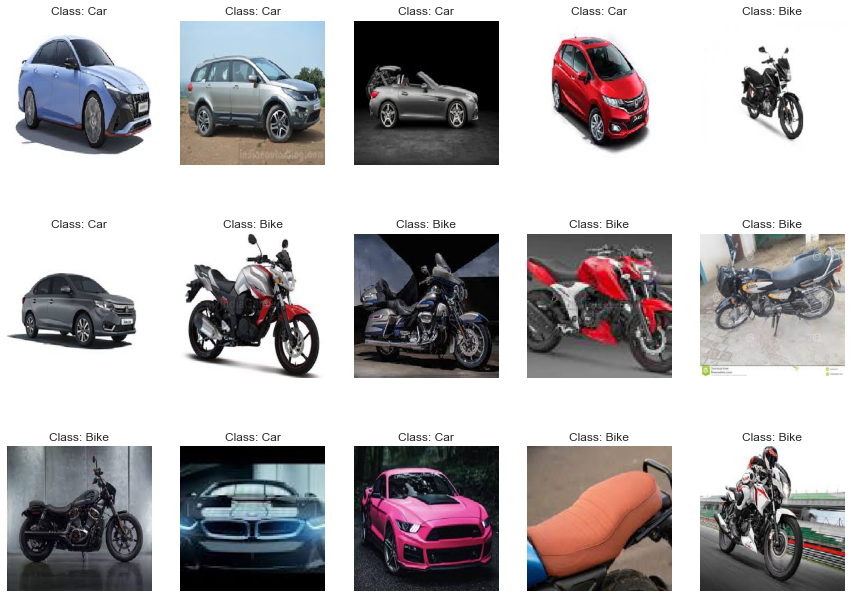

In [ ]:
plot_random_images(training_data)

<img src="https://cdn-images-1.medium.com/max/651/1*UA30b0mJUPYoPvN8yJr2iQ.jpeg" style="width:800px;height:400px;">


**Mathematical representation of the algorithm:**

For a single training example $(x^{i})$:
$$z^{(i)} = w^T x^{(i)} + b$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$


Main steps for building a logistic regression algorithm with a neural network mindset are:
- Initialzing model parameters (w and b)
- Apply sigmoid function
- Calculate loss (forward propagation)
- Calculate gradients (backward propagation)
- Update parameters (gradient descent)


##Sigmoid Function

<img src="https://ai-master.gitbooks.io/logistic-regression/content/assets/sigmoid_function.png" style="width:600px;height:400px;">


In [ ]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

##Initializing Parameters

Here, we will create a function which initializes our weights ($w_1, w_2... w_n$) and bias ($b$). It will take size as a input and will create a vector of zeros of shape (size, 1) (which will be our vector of weights) and it will initialize $b$ to 0.

In [ ]:
def initialize(size):
    """
    Argument:
    size -- size of the w vector we want 
    """
    w = np.zeros((size, 1))
    b = 0
    return w, b

##Forward and backward propagation

**Formulas used**

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [ ]:
def propagate(w, b, X, Y):
    """
    Arguments:
    w -- weights (Array of size (num_pxs * num_pxs * 3, no. of examples))
    b -- bias (scaler)
    X -- data of size (num_pxs * num_pxs * 3, no. of examples)
    Y -- true "label" vector of size (1, no. of examples)
    """

    m = X.shape[1]                # Number of examples
    Z = np.dot(w.T, X) + b        # Calculating W1*X1 + W2*X2 + ... + b
    A = sigmoid(Z)                # Applying sigmoid activation function
    
    # Cost
    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m
    
    # Calculating gradients    
    dw = (np.dot(X, (A - Y).T)) / m
    db = (np.sum(A - Y)) / m

    return dw, db, cost

##OPTIMIZATION

Here we will create a function which will keep on updating parameters until the gradient descent is converged

In [ ]:
def optimize(w, b, X, Y, iterations, learning_rate):
    """
    Arguments:
    w -- weights (Array of size (num_pxs * num_pxs * 3, no. of examples))
    b -- bias (scaler)
    X -- data of size (num_pxs * num_pxs * 3, no. of examples)
    Y -- true "label" vector of size (1, no. of examples)
    iterations -- Number of times the loop will run
    learning_rate -- Learning Rate of the gradient descent
    """

    costs = []
    for i in range(iterations):

        dw, db, cost = propagate(w, b, X, Y)
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        costs.append(cost)

    return dw, db, w, b, costs

##PREDICTION

In [ ]:
def predict(w, b, X):
    """ 
    w -- weights (Array of size (num_pxs * num_pxs * 3, no. of examples))
    b -- bias (scaler)
    X -- data of size (num_pxs * num_pxs * 3, no. of examples)
    """

    m = X.shape[1]
    y_pred = np.zeros((1, m))
    A = sigmoid(np.dot(w.T,X) + b)

    for i in range(A.shape[1]):
        if A[0, i] >= 0.5:
            y_pred[0, i] = 1
        else:
            y_pred[0, i] = 0

    return y_pred

##BUILDING THE MODEL

In [ ]:
def model(X_train, y_train, X_test, y_test, num_iterations, learning_rate):
    """ 
    Arguments:
    X_train -- training set of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels of shape (1, m_train)
    X_test -- test set of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels of shape (1, m_test)
    iterations -- Number of times the loop will run
    learning_rate -- Learning Rate of the gradient descent
    """

    w, b = initialize(X_train.shape[0])
    dw, db, w, b, costs = optimize(w, b, X_train, y_train, 
                                   iterations= num_iterations, learning_rate= learning_rate)
    
    y_pred_train = predict(w, b, X_train)
    y_pred_test = predict(w, b, X_test)

    train_accuracy = 100 - round(np.mean(np.abs(y_pred_train - y_train)) * 100, 3)
    test_accuracy = 100 - round(np.mean(np.abs(y_pred_test - y_test)) * 100, 3)

    print(f"Training accuracy: {train_accuracy} %")
    print(f"Test accuracy: {test_accuracy} %")

    predictions = {
        "training_predictions" : y_pred_train,
        "test_predictions" : y_pred_test,
    }

    return predictions, costs

In [ ]:
predictions, costs = model(train_images[:, :1000], train_labels[:, :1000], test_images, test_labels, 
                           num_iterations= 200, learning_rate= 0.0001)

Training accuracy: 58.7 %
Test accuracy: 50.0 %


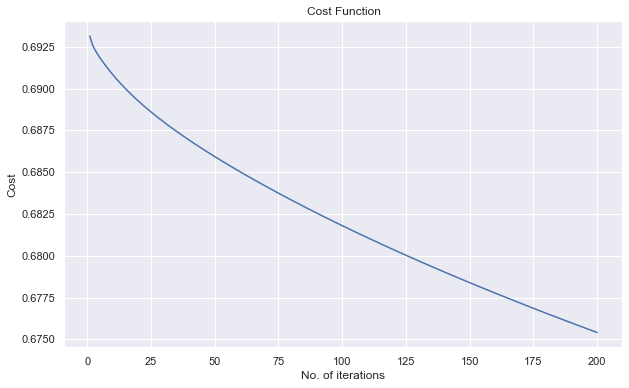

In [ ]:
plt.figure(figsize = (10, 6))
plt.title('Cost Function')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(range(1, 201), costs)
plt.show()